# Image Derivatives
This exercise introduces image derivative operators.

In [10]:
%matplotlib notebook
!pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from scipy import ndimage
import math

## Some Convenience Functions.

In [2]:
def convolve_with_two(image, kernel1, kernel2):
    """Apply two filters, one after the other."""
    image = ndimage.convolve(image, kernel1)
    image = ndimage.convolve(image, kernel2)   
    return image

def imread_gray(filename):
    """Read grayscale image."""
    return cv2.imread(filename, cv2.IMREAD_GRAYSCALE).astype(np.float32)

def plot_multiple(images, titles, colormap='gray', max_columns=np.inf, share_axes=True):
    """Plot multiple images as subplots on a grid."""
    assert len(images) == len(titles)
    n_images = len(images)
    n_cols = min(max_columns, n_images)
    n_rows = int(np.ceil(n_images / n_cols))
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4),
        squeeze=False, sharex=share_axes, sharey=share_axes)

    axes = axes.flat
    # Hide subplots without content
    for ax in axes[n_images:]:
        ax.axis('off')
        
    if not isinstance(colormap, (list,tuple)):
        colormaps = [colormap]*n_images
    else:
        colormaps = colormap

    for ax, image, title, cmap in zip(axes, images, titles, colormaps):
        ax.imshow(image, cmap=cmap)
        ax.set_title(title)
        
    fig.tight_layout()

In [25]:
# From Question 1: Gaussian Filtering
def gauss(x, sigma):
    # YOUR CODE HERE
    Exponential_term = np.square(x)/(2*sigma**2)
#     G = np.array
#     for i in len(x):
    G = (1/((2*math.pi)**0.5)*sigma)*np.exp(-Exponential_term)
    return G   
    raise NotImplementedError()

## Part a
Implement a function for creating a Gaussian derivative filter in 1D according to the following equation
\begin{eqnarray}
    \frac{d}{dx} G &=& \frac{d}{dx} \frac{1}{\sqrt{2\pi}\sigma} \operatorname{exp}\biggl(-\frac{x^2}{2\sigma^2}\biggr) \\
			       &=& -\frac{1}{\sqrt{2\pi}\sigma^3}x \operatorname{exp}\biggl(-\frac{x^2}{2\sigma^2}\biggr)
\end{eqnarray}
Your function should take a vector of integer values $x$ and the standard deviation ``sigma`` as arguments.

In [26]:
def gaussdx(x, sigma):
    exponent_term = np.exp(-1.5*(x/sigma)**2)
    G_d = -(x/(((2*math.pi)**0.5)*(sigma)**3))*exponent_term
    return G_d
    raise NotImplementedError()

<IPython.core.display.Javascript object>


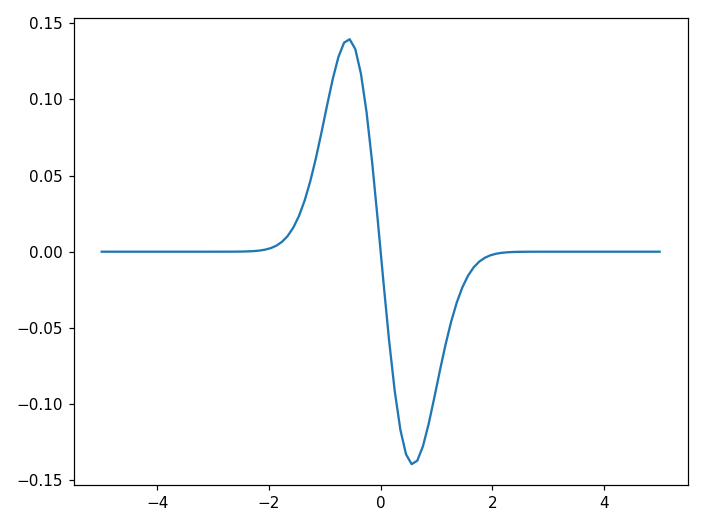

In [27]:
x = np.linspace(-5, 5, 100)
y = gaussdx(x, sigma=1.0)
fig, ax = plt.subplots()
ax.plot(x, y)
fig.tight_layout()

The effect of a filter can be studied by observing its so-called *impulse response*.
For this, create a test image in which only the central pixel has a non-zero value (called an *impulse*):

<IPython.core.display.Javascript object>


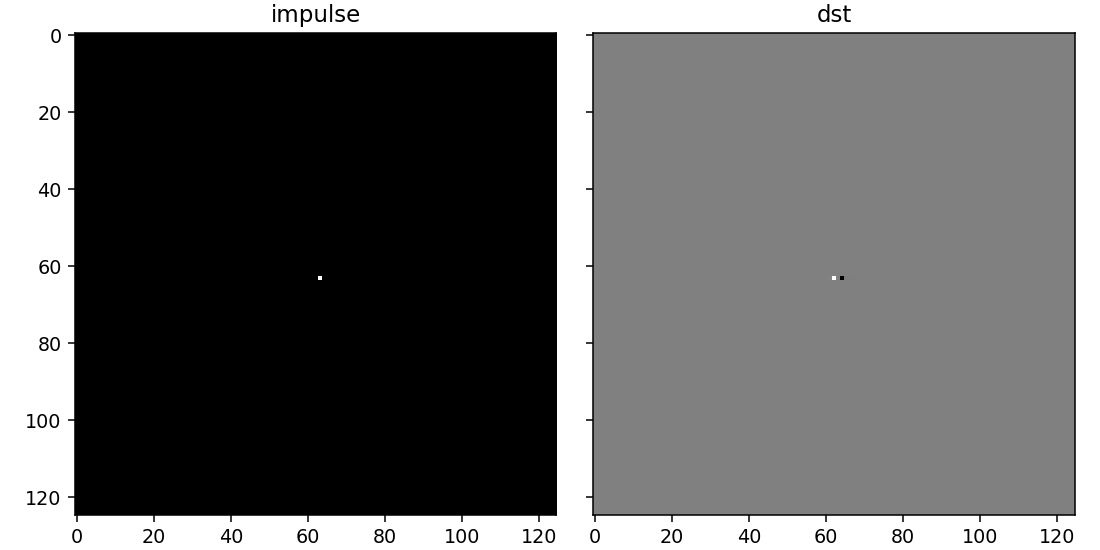

In [77]:
impulse = np.zeros((125,125))
impulse[125//2 +1, 125//2+1] = 255
dst = ndimage.convolve(impulse,gaussdx(x,1))
plot_multiple([impulse,dst],['impulse', 'dst'],  max_columns=2)
# raise NotImplementedError()

Now, we create the following 1D filter kernels ``gaussian`` and ``derivative``.

In [33]:
sigma = 6.0
kernel_radius = int(3.0 * sigma)
x = np.arange(-kernel_radius, kernel_radius + 1)[np.newaxis]
G = gauss(x, sigma)
D = gaussdx(x, sigma)

What happens when you apply the following filter combinations?

- first ``gaussian``, then ``gaussian^T``.
- first ``gaussian``, then ``derivative^T``.
- first ``derivative``, then ``gaussian^T``.
- first ``gaussian^T``, then ``derivative``.
- first ``derivative^T``, then ``gaussian``.

Display the result images with the `plot_multiple` function. Describe your result.

<IPython.core.display.Javascript object>


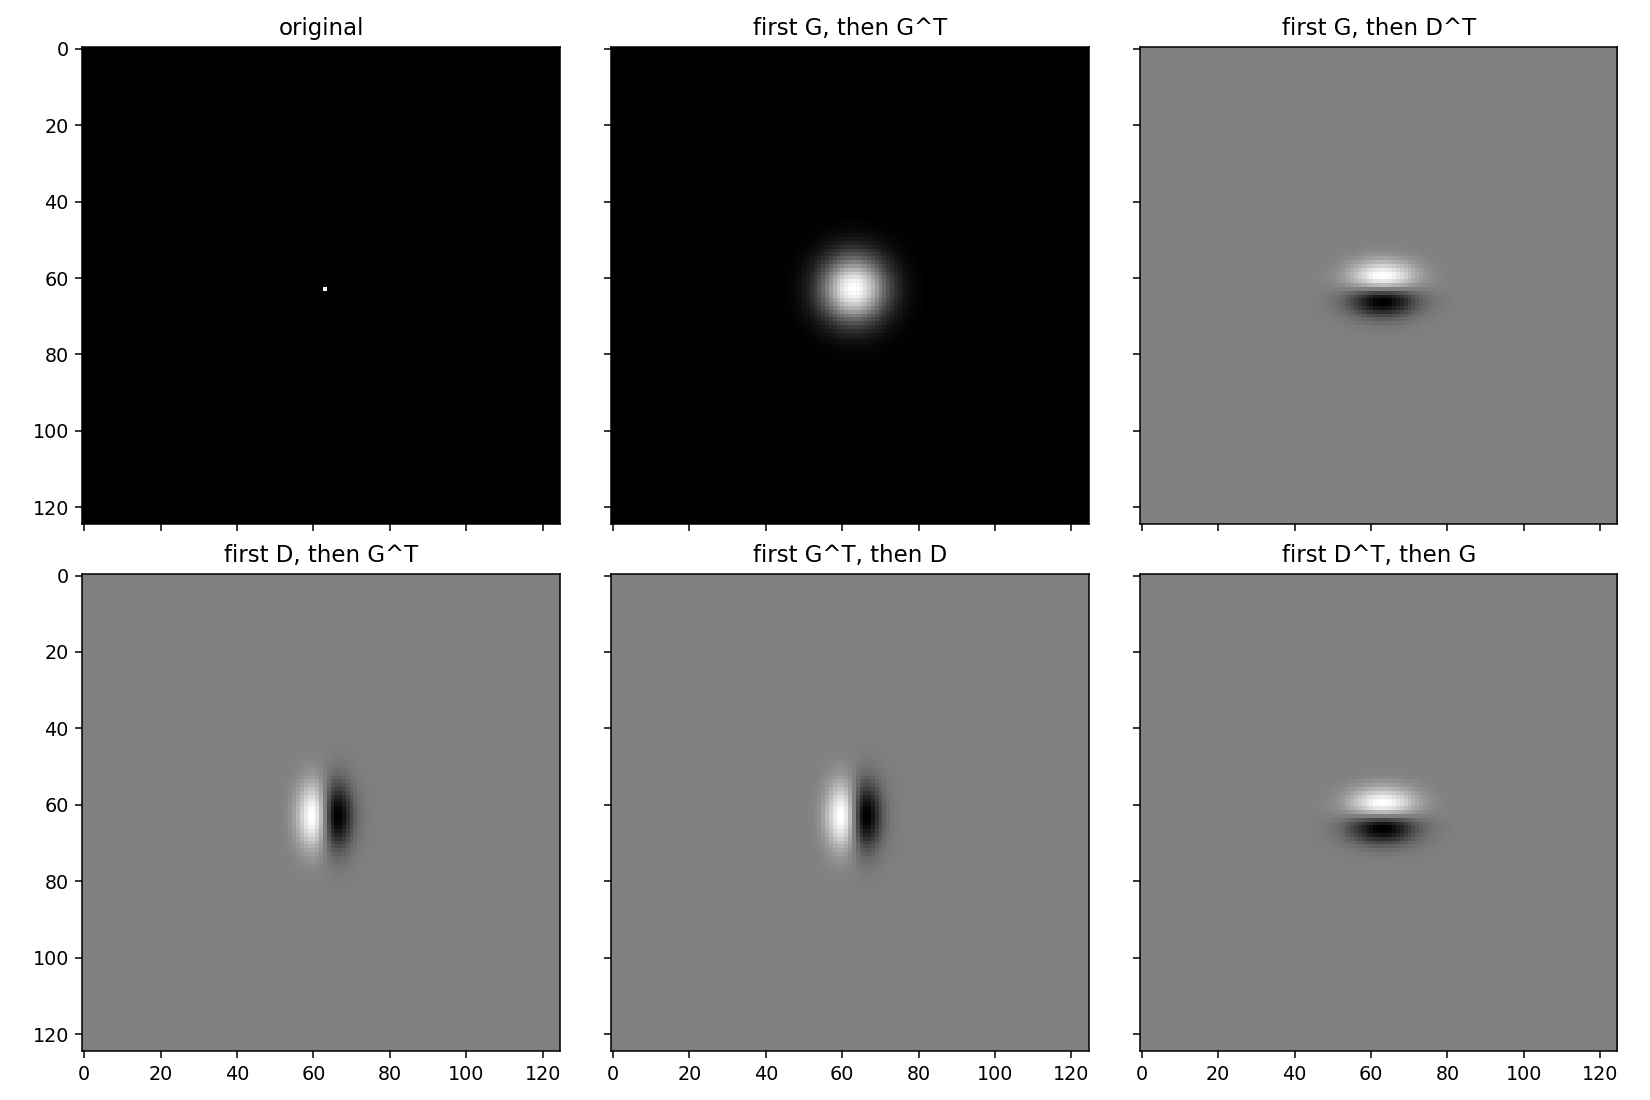

In [79]:
images = [
    impulse,
    convolve_with_two(impulse, G, G.T),
    convolve_with_two(impulse, G, D.T),
    convolve_with_two(impulse, D, G.T),
    convolve_with_two(impulse, G.T, D),
    convolve_with_two(impulse, D.T, G)]

titles = [
    'original',
    'first G, then G^T',
    'first G, then D^T',
    'first D, then G^T',
    'first G^T, then D',
    'first D^T, then G']

plot_multiple(images, titles, max_columns=3)

## Part b

Use the functions ``gauss`` and ``gaussdx`` directly in order to create a new function ``gaussderiv`` that returns the 2D Gaussian derivatives of an input image in $x$ and $y$ direction.

In [49]:
def gauss_derivs(image, sigma):
    kernel_radius = int(3.0 * sigma)
    image_dx = ndimage.convolve(image,gaussdx(x,sigma))
    image_dy = ndimage.convolve(image,gaussdx(x,sigma).T)
    return image_dx, image_dy
    raise NotImplementedError()

array([[ 0.04122356,  0.11920766,  0.18509772, ...,  0.12060358,
         0.08031727,  0.02825013],
       [ 0.02785523,  0.08035641,  0.12466462, ...,  0.15838294,
         0.10173979,  0.03514906],
       [ 0.03311745,  0.09683199,  0.15350841, ...,  0.21818079,
         0.13772224,  0.0471397 ],
       ...,
       [-0.03082921, -0.09245431, -0.15354705, ...,  0.05900516,
         0.0357543 ,  0.01195093],
       [-0.02150302, -0.06610399, -0.11480969, ...,  0.03145751,
         0.0158281 ,  0.00470067],
       [-0.01771521, -0.05409585, -0.09339041, ...,  0.05799537,
         0.03634418,  0.0123763 ]], dtype=float32)

Try the function on the given example images and describe your results.

<IPython.core.display.Javascript object>


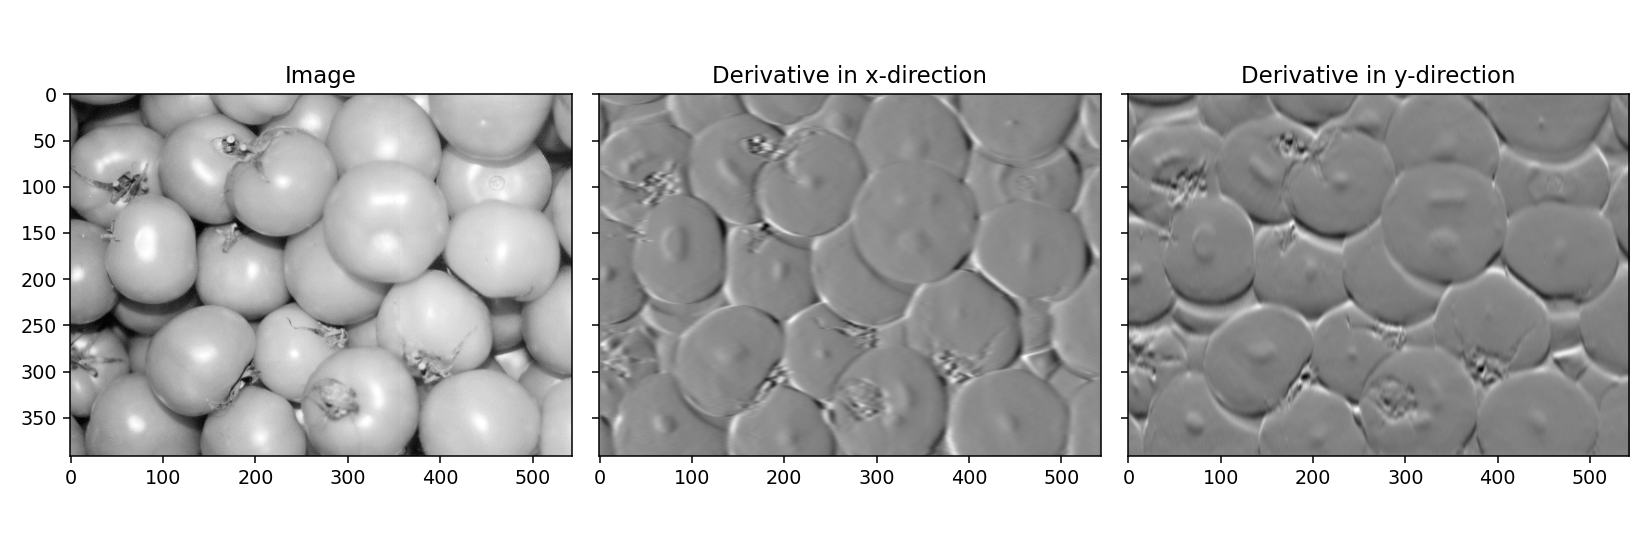

In [59]:
image = imread_gray('tomatoes.png')
grad_dx, grad_dy = gauss_derivs(image, sigma=5.0)
plot_multiple([image, grad_dx, grad_dy], ['Image', 'Derivative in x-direction', 'Derivative in y-direction'])

In a similar manner, create a new function ``gauss_second_derivs`` that returns the 2D second Gaussian derivatives $\frac{d^2}{dx^2}$, $\frac{d^2}{dx dy}$ and $\frac{d^2}{dy^2}$ of an input image.

In [ ]:
def gauss_second_derivs(image, sigma):
    kernel_radius = int(3.0 * sigma)
    # YOUR CODE HERE
    
    
    
    raise NotImplementedError()
    
    return image_dxx, image_dxy, image_dyy

Try the function on the given example images and describe your results.

In [ ]:
image = imread_gray('coins1.jpg')
grad_dxx, grad_dxy, grad_dyy = gauss_second_derivs(image, sigma=2.0)
plot_multiple([image, grad_dxx, grad_dxy, grad_dyy], ['Image', 'Dxx', 'Dxy','Dyy'])

In [ ]:
image = imread_gray('circuit.png')
grad_dxx, grad_dxy, grad_dyy = gauss_second_derivs(image, sigma=2.0)
plot_multiple([image, grad_dxx, grad_dxy, grad_dyy], ['Image', 'Dxx', 'Dxy','Dyy'])

## Part c
Create a new function ``image_gradients_polar`` that returns two images with the magnitude and orientation of the gradient for each pixel of the input image.

In [72]:
def image_gradients_polar(image, sigma):
    # YOUR CODE HERE
    img = ndimage.convolve(image, gaussdx(x,sigma) )
    sx = ndimage.sobel(img,axis=0,mode='constant')
    # Get y-gradient in "sy"
    sy = ndimage.sobel(img,axis=1,mode='constant')
    # Get square root of sum of squares
    magnitude=np.hypot(sx,sy)
    direction = np.arctan2(sy,sx)
    return magnitude, direction
    raise NotImplementedError()

In [69]:

# YOUR CODE HERE
img = ndimage.convolve(image, gaussdx(x,sigma) )
sx = ndimage.sobel(img,axis=0,mode='constant')
sx
# Get y-gradient in "sy"
sy = ndimage.sobel(img,axis=1,mode='constant')
sy
# Get square root of sum of squares
sobel=np.hypot(sx,sy)
sobel
direction = np.arctan2(sy,sx)
direction

array([[ 1.167362  ,  0.88726   ,  0.5644182 , ..., -0.35646474,
        -0.65971404, -0.99042696],
       [ 1.6728628 ,  1.7531753 ,  1.8795717 , ..., -0.81181663,
        -1.1449475 , -1.348709  ],
       [ 1.4029349 ,  1.2648638 ,  1.0459203 , ..., -1.5691577 ,
        -1.6179823 , -1.611961  ],
       ...,
       [-1.4082414 , -1.2997684 , -1.1744626 , ..., -2.4468718 ,
        -2.2567236 , -2.0294163 ],
       [-1.3431201 , -1.1993121 , -1.0507678 , ..., -1.6096383 ,
        -1.566724  , -1.5569123 ],
       [-1.0114744 , -0.7389299 , -0.5256997 , ..., -2.4179046 ,
        -2.092422  , -1.848459  ]], dtype=float32)

Try the function on the given example images and describe your results.

<IPython.core.display.Javascript object>


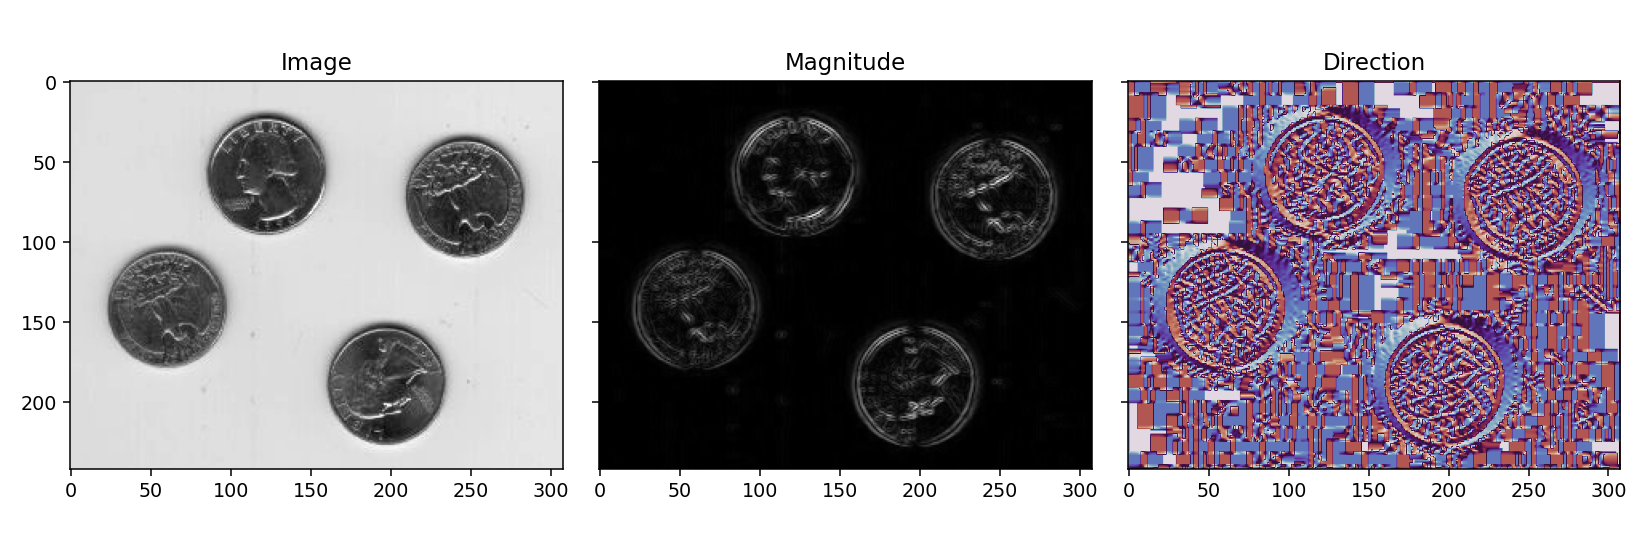

In [73]:
image = imread_gray('coins1.jpg')
grad_mag, grad_dir = image_gradients_polar(image, sigma=2.0)

# Note: the twilight colormap only works since Matplotlib 3.0, use 'gray' in earlier versions.
plot_multiple([image, grad_mag, grad_dir], ['Image', 'Magnitude', 'Direction'], colormap=['gray', 'gray', 'twilight']) 

<IPython.core.display.Javascript object>


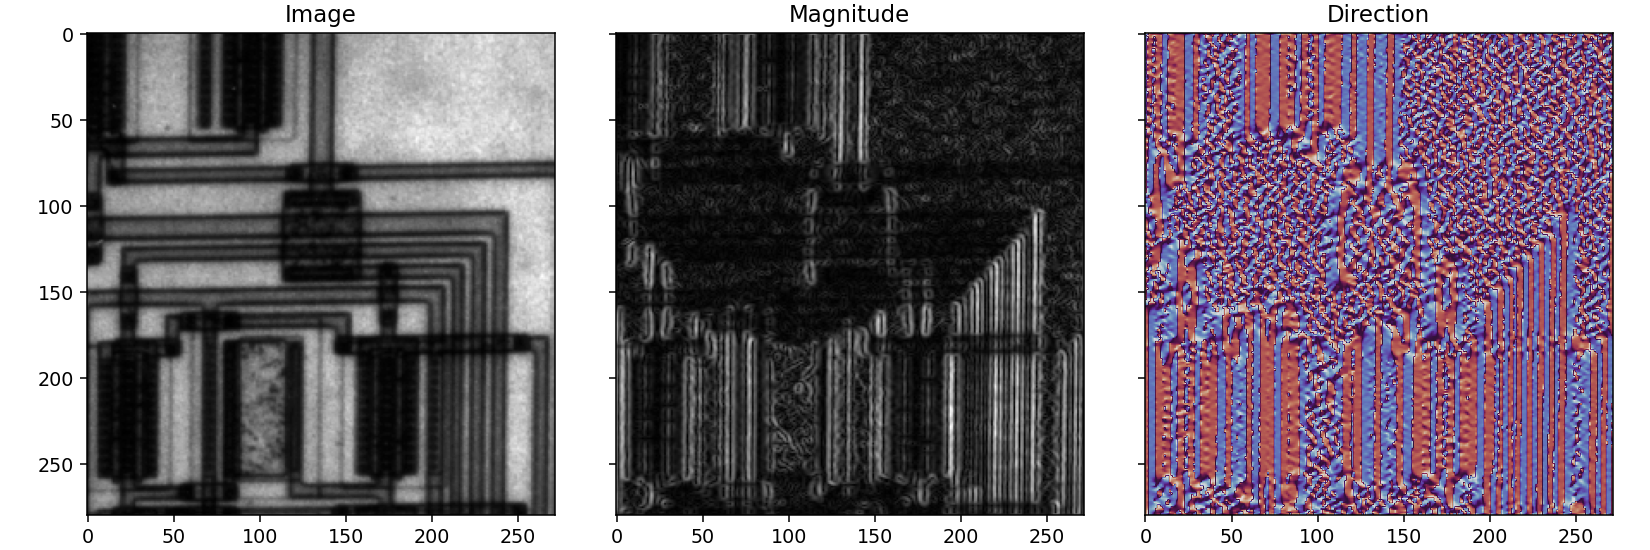

In [74]:
image = imread_gray('circuit.png')
grad_mag, grad_theta = image_gradients_polar(image, sigma=2.0)
plot_multiple([image, grad_mag, grad_theta], ['Image', 'Magnitude', 'Direction'], colormap=['gray', 'gray', 'twilight'])

## Part d
Create a new function ``laplace`` that returns an image with the Laplacian-of-Gaussian for each pixel of the input image.

In [ ]:
def laplace(image, sigma):
    # YOUR CODE HERE
    raise NotImplementedError()

Try the function on the given example images and describe your results.

In [ ]:
image = imread_gray('coins1.jpg')
lap = laplace(image, sigma=2.0)
plot_multiple([image, lap], ['Image', 'Laplace'])

In [ ]:
image = imread_gray('circuit.png')
lap = laplace(image, sigma=2.0)
plot_multiple([image, lap], ['Image', 'Laplace'])